In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from mnist.nn_neural_network import NeuralNetwork
from mnist.nn_data_utils import DataUtils
from mnist.nn_metrics import Metrics
from mnist.nn_encoders import Encoders
from mnist.nn_activations import Activations

In [2]:
df = pd.read_csv('train.csv')

In [3]:
neural_model = NeuralNetwork(df)
dataset = DataUtils(df)

In [4]:
X_train, X_test, y_train, y_test = dataset.train_test_split(df)

In [5]:
w1,b1,w2,b2 = neural_model.gradient_descent(X_train, y_train, 0.1, 500) 

Epoch:  1
Epoch:  11
Epoch:  21
Epoch:  31
Epoch:  41
Epoch:  51
Epoch:  61
Epoch:  71
Epoch:  81
Epoch:  91
Epoch:  101
Epoch:  111
Epoch:  121
Epoch:  131
Epoch:  141
Epoch:  151
Epoch:  161
Epoch:  171
Epoch:  181
Epoch:  191
Epoch:  201
Epoch:  211
Epoch:  221
Epoch:  231
Epoch:  241
Epoch:  251
Epoch:  261
Epoch:  271
Epoch:  281
Epoch:  291
Epoch:  301
Epoch:  311
Epoch:  321
Epoch:  331
Epoch:  341
Epoch:  351
Epoch:  361
Epoch:  371
Epoch:  381
Epoch:  391
Epoch:  401
Epoch:  411
Epoch:  421
Epoch:  431
Epoch:  441
Epoch:  451
Epoch:  461
Epoch:  471
Epoch:  481
Epoch:  491


In [6]:
weights = (w1, b1, w2, b2)

In [7]:
print(w1)
print("_______________")
print(weights[1])

[[ 0.26795993 -0.23664589  0.18800999 ...  0.10733519 -0.22247814
   0.22094235]
 [ 0.01430746  0.48013037 -0.28346522 ...  0.35651443 -0.25443304
   0.04062515]
 [ 0.10072869 -0.03782566 -0.26870253 ... -0.0411361   0.23311621
   0.13148912]
 ...
 [ 0.20780805  0.21044331 -0.33160795 ...  0.25402261  0.03399726
   0.49957278]
 [-0.14815558 -0.44737447 -0.45839947 ...  0.17576392  0.16178902
  -0.17437012]
 [-0.39030825 -0.19627267 -0.3688234  ...  0.18173271 -0.1264259
  -0.07690499]]
_______________
[[0.24158308]
 [0.73946831]
 [0.31593928]
 [0.06617523]
 [0.0722805 ]
 [0.74037084]
 [0.77965373]
 [1.01282749]
 [0.7884186 ]
 [0.8891716 ]]


In [8]:
print(weights[0])

[[ 0.26795993 -0.23664589  0.18800999 ...  0.10733519 -0.22247814
   0.22094235]
 [ 0.01430746  0.48013037 -0.28346522 ...  0.35651443 -0.25443304
   0.04062515]
 [ 0.10072869 -0.03782566 -0.26870253 ... -0.0411361   0.23311621
   0.13148912]
 ...
 [ 0.20780805  0.21044331 -0.33160795 ...  0.25402261  0.03399726
   0.49957278]
 [-0.14815558 -0.44737447 -0.45839947 ...  0.17576392  0.16178902
  -0.17437012]
 [-0.39030825 -0.19627267 -0.3688234  ...  0.18173271 -0.1264259
  -0.07690499]]


In [9]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = neural_model.forward(W1, b1, W2, b2, X)
    predictions = neural_model.get_predictions(A2)
    return predictions

In [10]:
a = np.zeros(784)

In [11]:
def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]

    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)

    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [6]
Label:  6


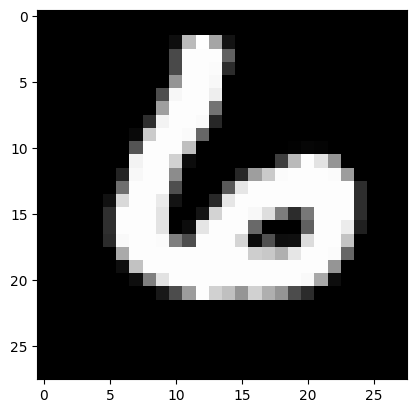

In [12]:
test_prediction(0, weights[0],weights[1], weights[2], weights[3])

In [13]:
import pickle

In [14]:
filename = "finalised_model_02.sav"
pickle.dump(weights, open(filename, "wb"))